# BigMart Sales Prediction

<center><img src = "https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/final-grocery--cover-thumbnail-1200x1200.png"
     width = "900"
     height = "400"/>

<div class="list-group" id="list-tab" role="tablist">
  <h3 style="background-color:#C0C0C0;color:#FFFFFF;" class="list-group-item list-group-item-action" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-one" role="tab" aria-controls="profile">Problem Definition<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-two" role="tab" aria-controls="settings">Exploratory Data Analysis (EDA)<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#section-three" role="tab" aria-controls="settings">Data Treatment and Preprocessing<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-four" role="tab" aria-controls="settings">Model Building<span class="badge badge-primary badge-pill">4</span></a> 

## <a id='section-one'></a>Problem Definition

**Sales prediction** is a very common real life problem that each company faces at least once in its life time. If done correctly, it can have a significant impact on the success and performance of that company.

The data scientists at **BigMart** have collected 2013 sales data for **1559 products** across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet**. So, the dependent variable will be the `Item_Outlet_Sales`.

### List of the variables included in the dataset and description
|Variable| Description|
|:----------------------:|:-----------:|
|<b>Item_Identifier</b>|Unique product ID|
|<b>Item_Weight</b>|Weight of product|
|<b>Item_Fat_Content</b>|Whether the product is low fat or not|
|<b>Item_Visibility</b>|The % of total display area of all products in a store allocated to the particular product|
|<b>Item_Type</b>|The category to which the product belongs|
|<b>Item_MRP</b>|Maximum Retail Price (list price) of the product|
|<b>Outlet_Identifier</b>|Unique store ID|
|<b>Outlet_Establishment_Year</b>|The year in which store was established|
|<b>Outlet_Size</b>|The size of the store in terms of ground area covered|
|<b>Outlet_Location_Type</b>|The type of city in which the store is located|
|<b>Outlet_Type</b>|Whether the outlet is just a grocery store or some sort of supermarket|
|<b>Item_Outlet_Sales</b>|Sales of the product in the particular store. This is the outcome variable to be predicted (for training set only)|

Source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatementBy

## <a id='section-two'></a> Exploratory Data Analysis (EDA)

In [1]:
# Importing the necessary libraries
import pandas as pd # for reading and manipulating dataframes
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for building visualizations
import seaborn as sns # for building visualizations

In [2]:
# Reading the training dataset
df_train = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
df_test = pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')

In [3]:
# Take a look at the training dataset
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Take a look at the testing dataset
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Get a glimpse of the number of rows and columns in the dataset
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [6]:
# Explore the number of null values and columns' types in train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Explore the number of null values and columns' types in test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
# Get a sense of null values in the 'Item_Weight' column using `Item_Identifier`
df_train['Item_Weight'].isna().groupby(df_train['Item_Identifier']).sum()

Item_Identifier
DRA12    0
DRA24    2
DRA59    2
DRB01    1
DRB13    0
        ..
NCZ30    1
NCZ41    0
NCZ42    0
NCZ53    1
NCZ54    2
Name: Item_Weight, Length: 1559, dtype: int64

In [9]:
# Check the unique values in the `Item_Fat_Content` column
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
# Check the accuracy of the above result
df_train[df_train['Item_Identifier']== 'DRA24']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436


In [11]:
# Get a sense of null values in the 'Outlet_Size' column using `Outlet_Type` and 'Outlet_Location_Type'
df_train[pd.isna(df_train['Outlet_Size'])].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
Supermarket Type1  Tier 2                  1855
Name: Outlet_Type, dtype: int64

In [12]:
# Figure out the outlet size in each location and for each type
df_train.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [13]:
# Get a sense of null values in the 'Outlet_Size' column using `Outlet_Type` and 'Outlet_Location_Type' test dataset
df_test[pd.isna(df_test['Outlet_Size'])].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   370
Supermarket Type1  Tier 2                  1236
Name: Outlet_Type, dtype: int64

##### Comment

- It appears both **Grocery Stores** and **Supermarkets Type1** in **Tier 2** have *Small* Outlet size.

### Univariate Analysis

In [14]:
# Figure out summary statistics for the dataset
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


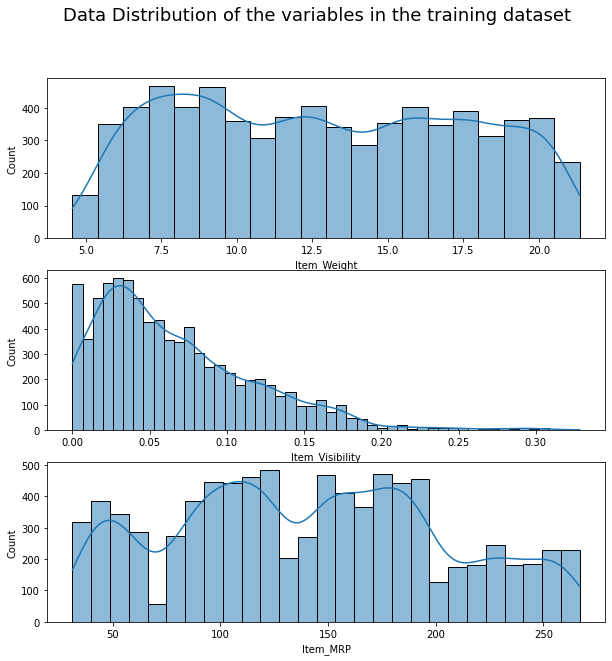

In [15]:
# Drawing multiple plots for the numerical variables above to get a sense of the distribution of the data
fig, ax = plt.subplots(3, 1, figsize = (10, 10))

sns.histplot(ax = ax[0],data = df_train, x='Item_Weight', kde=True)
sns.histplot(ax = ax[1],data = df_train, x='Item_Visibility', kde=True)
sns.histplot(ax = ax[2], data = df_train, x = 'Item_MRP', kde = True)

fig.suptitle('Data Distribution of the variables in the training dataset', size = 18)

plt.show()

##### Comment
- **As demonstrated, `Item_Visibility` has high skewness to the right**
- **The skewed data needs to be treated, as the skewness would affect the performance of learaning algorithm**
- **Normalization would also be applied on the numerical data since it is from the best practices of dealing with numerical features, since normalization ensures that each feature is treated equally when applying supervised learner.**

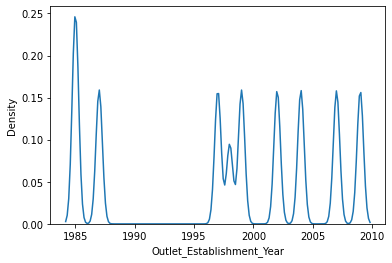

In [16]:
# Figure out the new outlets establishment across the years
sns.kdeplot(df_train['Outlet_Establishment_Year'],bw_adjust=.2)
plt.show()

##### Comment
- **It seems like there is a tendency to increase the outlets since 1995, as there were not any new establishments since around 1987.Despite, the year with the highest new establishments was 1985.**

### Bivariate Analysis

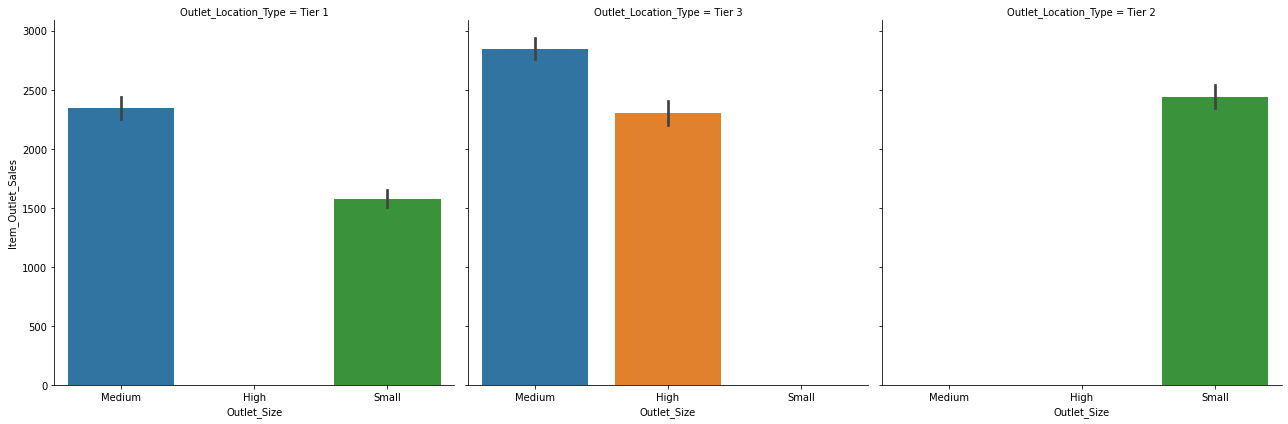

In [17]:
# Find out the level of sales for each outlet size in different locations
sns.catplot(data = df_train, x = 'Outlet_Size', y = 'Item_Outlet_Sales',\
            col = 'Outlet_Location_Type', kind='bar', aspect=1,\
           height = 6)

plt.show()

##### Comment
- **It seems like the Medium size outlets generate more sales**

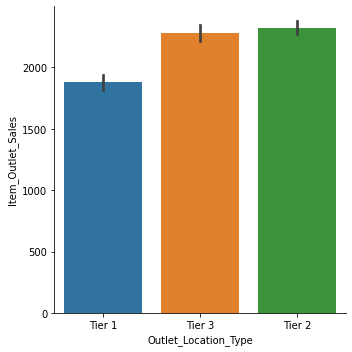

In [18]:
# The location with the highest sales
sns.catplot(data=df_train, x = 'Outlet_Location_Type', \
             y = 'Item_Outlet_Sales', kind = 'bar')

##### Comment
- **As demonstrated, Tier 2 location has the highest level of sales**

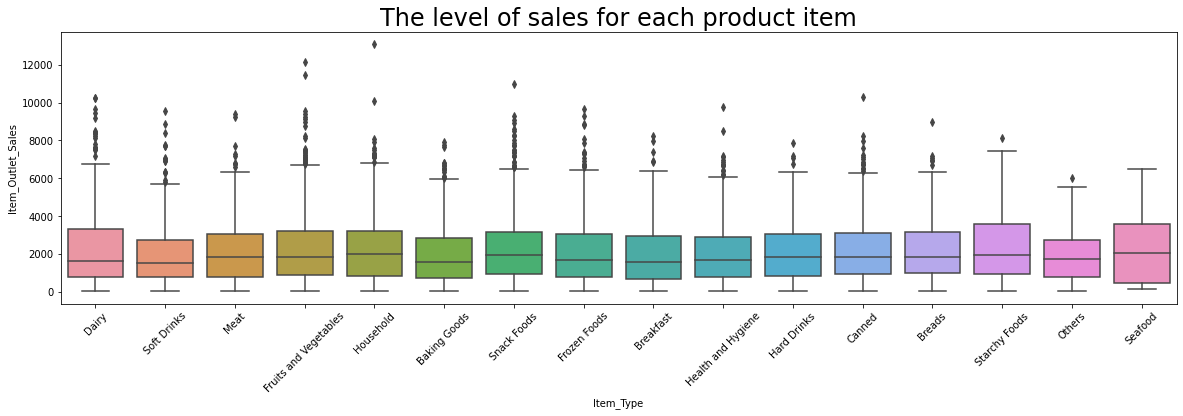

In [19]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data = df_train, x = 'Item_Type', y = 'Item_Outlet_Sales')

plt.title('The level of sales for each product item', fontdict={'fontsize':24})
plt.show()

##### Comment
- **The median level of sales is approx. the same for all item types, which is around 2000 except for some outlier points that nearly take place in all item types (except seafood)**

#### Multivariate Analysis

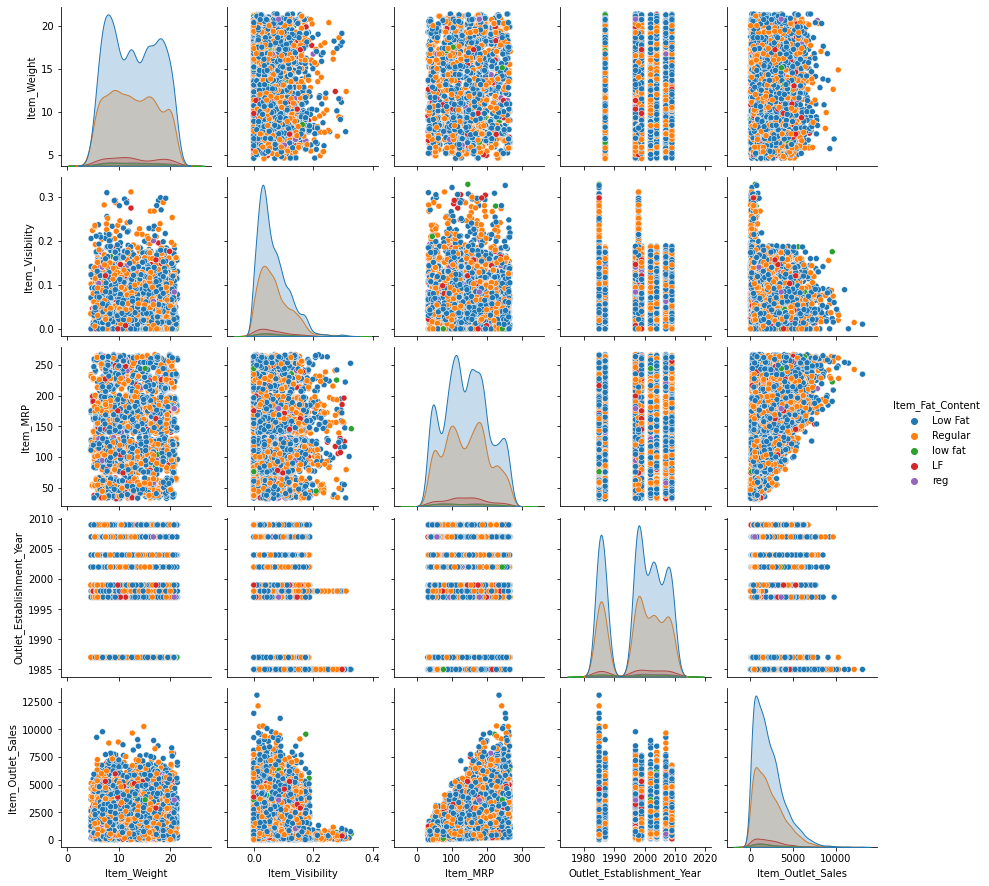

In [20]:
# Figure out the correlation among variables
sns.pairplot(df_train, hue='Item_Fat_Content')

##### Comment
- **Customers seem to prefere low fat products, since they have higher level of sales**
- **Low Fat products tend to have higher maximum retail price than regular content**
- **There are some items that have zero visibility which may be irrational** 

### Processes to be applied on the dataset

- `Outlet_Establishment_Year` should be turned into categorical instead of integer datatype.
- Change the values of `Item_Fat_Content` to only 'Regular' and 'Low Fat'
- We would fill the missing values in `Item_Weight` column with the corresponding value for each item based on `Item_Identifier`
- It appears both **Grocery Stores** and **Supermarkets Type1** have *Small* size. So, we will fill the missing `Outlet_Size` values with *Small*. 
- Replacing the 0 values in `Item_Visibility` column with the mean values of the column
- Treat the skewed continuous features
- Normalize the numerical features
- Apply one-hot encoding for the categorical data

## <a id='section-three'></a>Data Treatment and Preprocessing

In [21]:
# We will make a copy of the train and test dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

In [22]:
# Change the `Outlet_Establishment_Year` to categorical type
copy_train['Outlet_Establishment_Year'] = copy_train['Outlet_Establishment_Year'].astype('category')
# Check for the change of datatype
copy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


In [23]:
# Change the values of 'Item_Fat_Content' to only 'Regular' and 'Low Fat'
copy_train['Item_Fat_Content'] = copy_train['Item_Fat_Content'].apply(lambda x: 'Regular' if x.startswith('r') or x.startswith('R') else 'Low Fat')
copy_test['Item_Fat_Content'] = copy_test['Item_Fat_Content'].apply(lambda x: 'Regular' if x.startswith('r') or x.startswith('R') else 'Low Fat')

In [24]:
# Check for the values in `Item_Fat_Content`
copy_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
# Filling the null values in Item_Weight Column
copy_train['Item_Weight'] = copy_train['Item_Weight'].fillna(copy_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
# Filling the null values in Item_Weight Column on the test set
copy_test['Item_Weight'] = copy_test['Item_Weight'].fillna(copy_test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [26]:
# Check
print(copy_train['Item_Weight'].isna().sum())
print(copy_test['Item_Weight'].isna().sum())

4
20


In [27]:
# There are four values that are not filled let's check them
copy_train[copy_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [28]:
# There are 20 values that are not filled let's check them
copy_test[copy_test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [29]:
# Then we will fill these weights by the mean values of the 'Item_Type' they belong to
copy_train['Item_Weight'] = copy_train['Item_Weight'].fillna(copy_train.groupby('Item_Type')['Item_Weight'].transform('mean'))
# we will fill these weights by the mean values of the 'Item_Type' they belong to in the test set
copy_test['Item_Weight'] = copy_test['Item_Weight'].fillna(copy_test.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [30]:
# Recheck Again
print(copy_train['Item_Weight'].isna().sum())
print(copy_test['Item_Weight'].isna().sum())

0
0


- **Great, The problem of missing weights is resolved now**

In [31]:
# Fill the null values in `Outlet_Size` column with 'Small'
copy_train['Outlet_Size'] = copy_train['Outlet_Size'].fillna('Small')
# Fill the null values in `Outlet_Size` column with 'Small' on the test set
copy_test['Outlet_Size'] = copy_test['Outlet_Size'].fillna('Small')

In [32]:
# Recheck Again
print(copy_train['Outlet_Size'].isna().sum())
print(copy_test['Outlet_Size'].isna().sum())

0
0


- **The problem of missing outlet sizes is resolved. Check!**

In [33]:
# Replacing the 0 values in 'Item_Visibility' to the mean of the column
mean_visibility = copy_train[copy_train['Item_Visibility'] != 0]['Item_Visibility'].mean()
copy_train['Item_Visibility'] = copy_train['Item_Visibility'].replace(0, mean_visibility)

mean_visibility_test = copy_test[copy_test['Item_Visibility'] != 0]['Item_Visibility'].mean()
copy_test['Item_Visibility'] = copy_test['Item_Visibility'].replace(0, mean_visibility_test) 

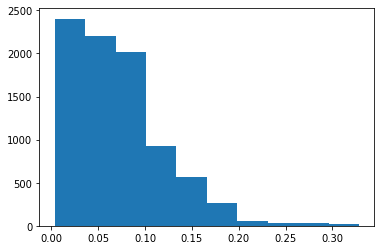

In [34]:
# Check for the existence of 0
plt.hist(copy_train['Item_Visibility'])
plt.show()

- **Here we fixed the issue of the existence of zero in item visibility**

#### Transforming skewed continuous features

In [35]:
# Log transform the skewed features
skewed = ['Item_Visibility']
copy_train[skewed] = copy_train[skewed].apply(lambda x: np.log(x))
copy_test[skewed] = copy_test[skewed].apply(lambda x: np.log(x))

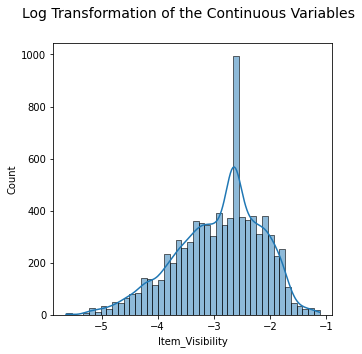

In [36]:
# Check the result of applying log transf
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

sns.histplot(ax = ax,data = copy_train, x='Item_Visibility', kde=True)

fig.suptitle('Log Transformation of the Continuous Variables', size = 14)

plt.show()

- **Great the `Item_Visibility` is now more normally distributed**

#### Normalizing numerical features

In [37]:
# Applying normalization to numerical data
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Item_Visibility', 'Item_MRP', 'Item_Weight']

copy_train[numerical]= scaler.fit_transform(copy_train[numerical]) 
copy_test[numerical]= scaler.fit_transform(copy_test[numerical]) 

In [38]:
# Check for the result of normalization
copy_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.495410,0.602775,0.465635,2181.288914
std,0.276571,0.169432,0.264327,1706.499616
min,0.000000,0.000000,0.000000,33.290000
25%,0.251861,0.492268,0.265437,834.247400
50%,0.481989,0.633041,0.474209,1794.331000
75%,0.732063,0.724643,0.655156,3101.296400
max,1.000000,1.000000,1.000000,13086.964800


- **Now our numerical data is normalized**

#### Applying one-hot label encoding

In [39]:
# Features to apply one-hot encoding on
labels = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',\
          'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',\
          'Outlet_Location_Type','Outlet_Type']
# Applying the one-hot encoding on the chosen features
label_encoder = pd.get_dummies(copy_train[labels])
copy_train = copy_train.drop(labels, axis = 1)
copy_train = pd.concat([copy_train, label_encoder], axis = 1)

In [40]:
# Check for shape of data after applying one-hot encoding
copy_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.332202,0.927507,3735.1380,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.372782,0.072068,443.4228,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.341816,0.468288,2097.2700,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.659571,0.640093,732.3800,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.659571,0.095805,994.7052,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


#### Now, we can say that our data is ready for Model Building stage.

## <a id='section-four'></a> Model Building

**Model Building stage will take be on the following flow:**

- Splitting the data into training and testing dataset
- Apply multiple algorithms on the training set
- Choose the model with the best performance
- Model Tuning
- Choosing the most important features

#### Splitting the data into training and testing dataset

In [41]:
# The independent variables (Predictors)
X = copy_train.drop('Item_Outlet_Sales', axis = 1)
# The dependent variable (Target)
y = copy_train['Item_Outlet_Sales']

In [42]:
# Importing train_test_split library
from sklearn.model_selection import train_test_split
# Split the 'features' and 'target' data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state = 10)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_test.shape[0]))

Training set has 6818 samples.
Validation set has 1705 samples.


#### Apply multiple algorithms on the training set

We will choose the algorithm to predict the data depending on:

- <b>The coeficient of determination (R<sup>2</sup>)</b>: It is a measure for the goodness of fit, or alternatively, it measures the proportion of variance in the dependent variable **(Outlet level of sales)** that is explained by the model, It ranges from 0 to 1, 0 means the model does not have the ability to explain any variation in teh dependent variable and 1 means the model is perfectly explianing the variation in the dependent variable. Coefficient of determination is given by the following formula

$$ R^2 = 1 - \frac {RSS}{TSS}  $$


- <b>Mean Squared Error:</b> It measures the average squared difference between the estimated (predicted) values of the model and the actual values of the dependent variable. It is given by the following formula

$$ MSE = \frac{1}{n}\sum_{i=0}^{n}(Y_i - \hat Y_i)^2  $$

- <b>Mean Absolute Error:</b> It measures the average absolute difference between the estimated (predicted) values of the model and the actual values of the dependent variable. It is given by the following formula

$$ MAE = \frac{1}{n}\sum_{i=0}^{n} \lvert(Y_i - \hat Y_i)\rvert   $$


#### Lasso Regression

In [43]:
# Import time to know the duration of training model
from time import time
# Import Lasso Regression algorithm
from sklearn.linear_model import Lasso
# Import mean squared and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initiate the model
start = time()
las_model = Lasso(alpha = 1, max_iter=2000, random_state=10)
# Fit the model to our dataset
las_model.fit(X_train, y_train)
y_preds = las_model.predict(X_test)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{las_model.score(X_test, y_test)}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")

The duration of training is: 2.328195571899414
R_squared for the validation data is:0.5749843692125518
The mean squared error for the model is:1261621.4129990682 
The mean absolute error for the model is:828.3737313955454 


#### XGB Regression

In [44]:
# Import XGBRegressor algorithm
from xgboost import XGBRegressor
# Import mean squared and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# Initiate the model
start = time()
xgb_model = XGBRegressor(random_state = 10)
# Fit the model to our dataset
xgb_model.fit(X_train, y_train)
k_fold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=k_fold)
y_preds = xgb_model.predict(X_test)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{r2_score(y_test, y_preds)}")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")

The duration of training is: 425.47172713279724
R_squared for the validation data is:0.5778865471314476
K-fold CV average score: 0.5608649208337783
The mean squared error for the model is:1253006.5538231167 
The mean absolute error for the model is:774.3670326142485 


##### Comment
- **It seems that XGB algorithm is performing better than Lasso regression, However, the time of training the model for lasso regression is by far less than the Extreme Gradient Boosting algorithm (XGB). But here we care only for the performance factor instead of time factor. So, we will use XGB for model tuning stage.**

#### Model Tuning

In [45]:
# Import 'GridSearchCV', 'make_scorer' libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
reg = XGBRegressor(random_state = 10)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [5, 10, 15],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2, 3]}

# Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# Performing grid search on the regressor using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(reg, parameters, scoring = scorer)

# Fitting the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_

# Making predictions using the unoptimized and optimized model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R squared score on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("Mean Squared Error on testing data: {:.4f}".format(mean_squared_error(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final R squared score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))
print("Final F-Mean Squared Error on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions)))

Unoptimized model
------
R squared score on testing data: 0.5779
Mean Squared Error on testing data: 1253006.5538

Optimized Model
------
Final R squared score on the testing data: 0.5669
Final F-Mean Squared Error on the testing data: 1285629.8915


##### Comment
- **It seems that the unoptimized model is better, but we can add more parameters to test with but since it takes a long time we will use the unoptimized model for the next step**

#### Choosing the most important features 

<AxesSubplot:>

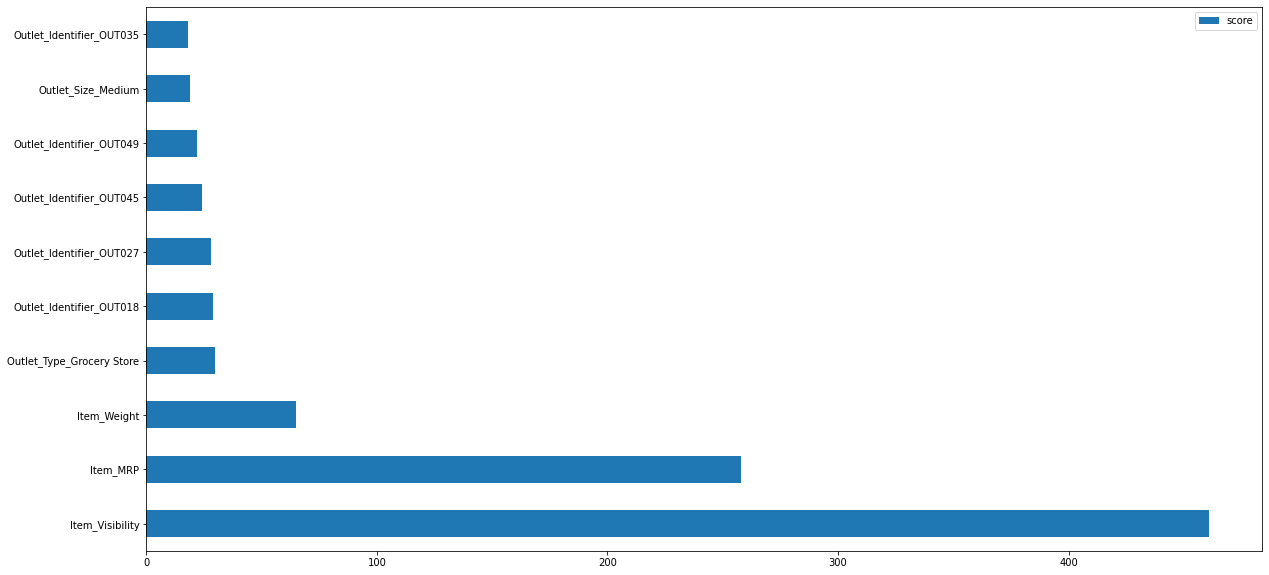

In [50]:
# Choosing the 10 features with the highest weight to train the model with
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10))

In [52]:
# Training and testing dataset with reduced dimensions
X_train_reduced = X_train[np.array(data.index[:10])]
X_test_reduced = X_test[np.array(data.index[:10])]

In [53]:
# Fit the best model to our dataset
start = time()
xgb_model.fit(X_train_reduced, y_train)
k_fold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train_reduced, y_train, cv=k_fold)
y_preds_red = xgb_model.predict(X_test_reduced)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{r2_score(y_test, y_preds_red)}")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds_red)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds_red)} ")

The duration of training is: 14.759913921356201
R_squared for the validation data is:0.52490509064279
K-fold CV average score: 0.5282191726242282
The mean squared error for the model is:1410277.3343685905 
The mean absolute error for the model is:822.302858574985 


##### Comment
- **Here we can see that the model with most important 10 features takes by far less time to run than the previous model and it gives values of scoring parameters that are close to the previous model with complete features**